In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('merged_sh_py3.csv')
df.head()

,client_id,hit_number,hit_page_path,event_category,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_screen_resolution,device_browser,geo_country,geo_city,visit_datetime,event_action_new
0,1.908674e+09,62,sberauto.com/cars/9e072915?rental_page=rental_car,card_web,1,source3,source3,source2,source2,desktop,1920x1080,YaBrowser,Russia,Moscow,2021-05-24 09:00:00+00:00,0
1,2.087810e+09,12,sberauto.com/cars/0208cd2b?utm_source_initial=...,card_web,1,source8,source1,other,other,mobile,360x640,YaBrowser,Russia,Moscow,2021-09-11 14:00:00+00:00,0
2,1.577262e+09,19,sberauto.com/cars/94b3d18e?utm_source_initial=...,card_web,1,source4,source4,source67,source33,desktop,1280x720,YaBrowser,Russia,Moscow,2021-08-30 14:00:00+00:00,0
3,1.976655e+09,13,sberauto.com/cars/f28947a1?utm_source_initial=...,card_web,8,source5,source5,source14,source2,mobile,393x851,Chrome,Russia,Moscow,2021-07-28 12:00:00+00:00,0
4,7.907644e+08,17,sberauto.com/cars/bfc21661?utm_source_initial=...,quiz,1,source5,source5,source3,source2,mobile,360x780,Chrome,Russia,Saint Petersburg,2021-09-01 14:00:00+00:00,0


In [3]:
# Кодирование категориальных фичей с помощью OneHotEncoder
columns_to_encode = [
    'event_category',
    'utm_source',
    'utm_medium',
    'utm_campaign',
    'utm_adcontent',
]

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_data = encoder.fit_transform(df[columns_to_encode])

# Получить имена закодированных столбцов
encoded_columns = encoder.get_feature_names_out(columns_to_encode)

# Создать новый DataFrame с закодированными признаками
df_encoded = pd.concat([df, pd.DataFrame(encoded_data, columns=encoded_columns)], axis=1)

In [4]:
df_encoded.head()

,client_id,hit_number,hit_page_path,event_category,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,utm_adcontent_source90,utm_adcontent_source91,utm_adcontent_source92,utm_adcontent_source93,utm_adcontent_source94,utm_adcontent_source95,utm_adcontent_source96,utm_adcontent_source97,utm_adcontent_source98,utm_adcontent_source99
0,1.908674e+09,62,sberauto.com/cars/9e072915?rental_page=rental_car,card_web,1,source3,source3,source2,source2,desktop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.087810e+09,12,sberauto.com/cars/0208cd2b?utm_source_initial=...,card_web,1,source8,source1,other,other,mobile,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.577262e+09,19,sberauto.com/cars/94b3d18e?utm_source_initial=...,card_web,1,source4,source4,source67,source33,desktop,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.976655e+09,13,sberauto.com/cars/f28947a1?utm_source_initial=...,card_web,8,source5,source5,source14,source2,mobile,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.907644e+08,17,sberauto.com/cars/bfc21661?utm_source_initial=...,quiz,1,source5,source5,source3,source2,mobile,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
columns_to_drop = [
    'client_id',
    'hit_number',
    'hit_page_path', 
    'event_category', 
    'visit_number', 
    'utm_source',
    'utm_medium',
    'utm_campaign',
    'utm_adcontent',
    'device_category',
    'device_screen_resolution',
    'device_browser',
    'geo_country',
    'geo_city',
    'visit_datetime'
]

df_encoded.drop(columns_to_drop, axis=1, inplace=True)

In [6]:
df_encoded.head()

,event_action_new,event_category_active_invitation,event_category_ad_banner,event_category_add_ad,event_category_add_ad_additional_information,event_category_add_ad_city,event_category_add_ad_description,event_category_add_ad_documents,event_category_add_ad_options,event_category_add_ad_photo,...,utm_adcontent_source90,utm_adcontent_source91,utm_adcontent_source92,utm_adcontent_source93,utm_adcontent_source94,utm_adcontent_source95,utm_adcontent_source96,utm_adcontent_source97,utm_adcontent_source98,utm_adcontent_source99
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
x = df_encoded.drop(['event_action_new'], axis=1)
y = df_encoded['event_action_new']

# Модели
models = [
    LogisticRegression(solver='liblinear'),
    RandomForestClassifier(),
    MLPClassifier(activation='logistic', hidden_layer_sizes=(256, 128, 64))
]

best_score = 0
best_pipe = None
best_model_name = None

for model in models:
    scores = cross_val_score(model, x, y, cv=5, scoring='accuracy', n_jobs=-1)
    average_score = np.mean(scores)
    if average_score > best_score:
        best_score = average_score
        best_model_name = type(model).__name__

print(f"Best model: {best_model_name}, best accuracy: {best_score}")

Best model: LogisticRegression, best accuracy: 0.9948068009372559


In [18]:
from sklearn.metrics import roc_auc_score, roc_curve

# Получение предсказанных вероятностей для ROC-AUC
y_pred_proba = LogisticRegression(solver='liblinear').fit(x, y).predict_proba(x)[:, 1]

# Вычисление ROC-AUC
roc_auc = roc_auc_score(y, y_pred_proba)
print("ROC-AUC для логистической регрессии:", roc_auc)

ROC-AUC для логистической регрессии: 0.9819596855118842


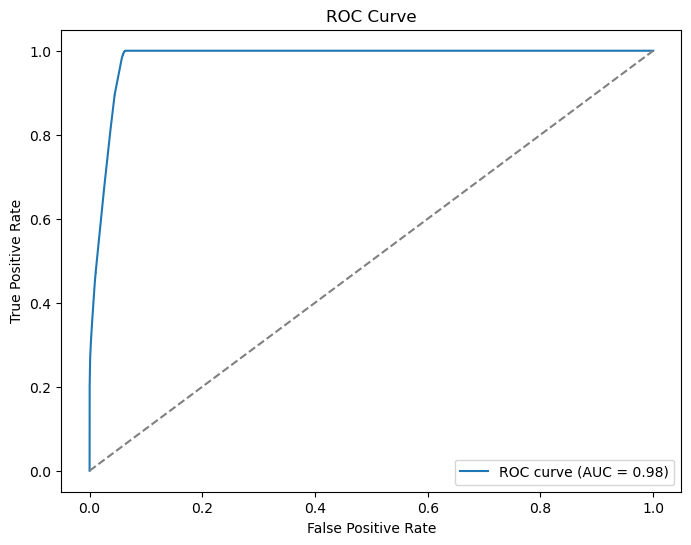

In [19]:
import matplotlib.pyplot as plt

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()